In [1]:
# Nạp các gói thư viện cần thiết
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
import numpy as np
# Đọc dữ liệu iris từ UCI (https://archive.ics.uci.edu/ml/datasets/Iris) 
# hoặc từ thư viện scikit-learn
# Tham khảo https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
iris = datasets.load_iris()
columns=["Petal length","Petal Width","Sepal Length","Sepal Width"]
df = pd.DataFrame(iris.data, columns=columns)
y = iris.target
print(df.describe())

# Sử dụng nghi thức kiểm tra hold-out
# Chia dữ liệu ngẫu nhiên thành 2 tập dữ liệu con:
# training set và test set theo tỷ lệ 70/30
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3) 
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)
#print(X_train.head())

       Petal length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: 0.956
No handles with labels found to put in legend.


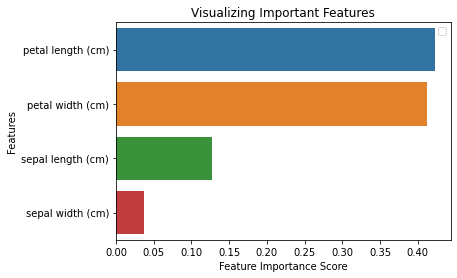

In [2]:
# Xây dựng mô hình rừng ngẫu nhiên với 100 cây quyết định 
model = RandomForestClassifier(n_estimators=100) 
model.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra 
y_pred = model.predict(X_test) 
#print(prediction)
# Tính độ chính xác
from sklearn.metrics import accuracy_score
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" % accuracy_score(y_test, y_pred))
# Tìm các thuộc tính quan trọng
feature_importances = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
# Hiển thị tầm quan trọng của các thuộc tính
import matplotlib.pyplot as plt
import seaborn as sns
# Vẽ biểu đổ
sns.barplot(x=feature_importances, y=feature_importances.index)
# Gán nhãn trục tung và trục hoành 
plt.xlabel('Feature Importance Score') 
plt.ylabel('Features') 
plt.title("Visualizing Important Features") 
plt.legend()
plt.show()

In [3]:
def load_datasets(name):
    if name == 'Iris':
        data = datasets.load_iris()
    elif name == 'Breast Cancer':
        data = datasets.load_breast_cancer()
    elif name == 'Wine':
        data = datasets.load_wine()
    elif name == 'Handwritten Digits':
        data = datasets.load_digits()
    df = pd.DataFrame(data.data)
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
    return X_train, X_test, y_train, y_test, data.feature_names

In [4]:
def plot_features_importance(model, features):
    top_features = 20
    feature_importances = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
    # Hiển thị tầm quan trọng của các thuộc tính
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Vẽ biểu đổ
    sns.barplot(x=feature_importances[:top_features], y=feature_importances.index[:top_features])
    # Gán nhãn trục tung và trục hoành 
    plt.xlabel('Feature Importance Score') 
    plt.ylabel('Features') 
    plt.title("Visualizing Important Features") 
    # plt.legend()
    plt.show()

In [5]:
def evaluate(dataset_name, model, X_test, y_test, features):
    # Dự đoán nhãn tập kiểm tra
    y_pred = model.predict(X_test) 
    # Tính độ chính xác
    print("%s Hold-out = %.3f" % (dataset_name, accuracy_score(y_test, y_pred)))
    plot_features_importance(model, features)


Breast Cancer Hold-out = 0.959


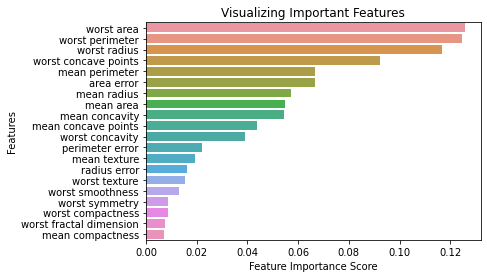

In [6]:
dataset_name = 'Breast Cancer'
X_train, X_test, y_train, y_test, features = load_datasets(dataset_name)
model = RandomForestClassifier(n_estimators=100) 
model.fit(X_train, y_train)
evaluate(dataset_name, model, X_test, y_test, features)

Wine Hold-out = 0.981


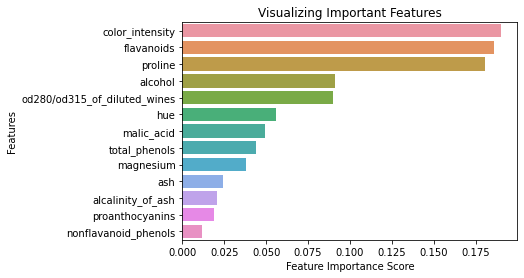

In [7]:
dataset_name = 'Wine'
X_train, X_test, y_train, y_test, features = load_datasets(dataset_name)
model = RandomForestClassifier(n_estimators=100) 
model.fit(X_train, y_train)
evaluate(dataset_name, model, X_test, y_test, features)

Handwritten Digits Hold-out = 0.985


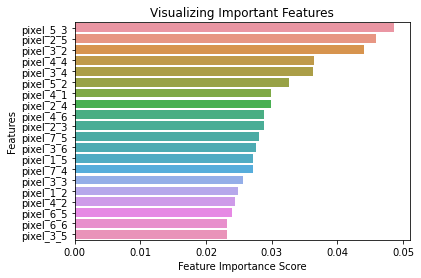

In [8]:
dataset_name = 'Handwritten Digits'
X_train, X_test, y_train, y_test, features = load_datasets(dataset_name)
model = RandomForestClassifier(n_estimators=100) 
model.fit(X_train, y_train)
evaluate(dataset_name, model, X_test, y_test, features)